In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
import seaborn as sns
import string
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import matplotlib.pyplot as plt
%matplotlib inline

# Классификация текстов
Вам предстоит написать свой классификатор текстов.

### Читаем данные

In [4]:
data = pd.read_csv('train_data.csv', index_col="Unnamed: 0")
data.head()

,lang,text
267430,ru,Приближался рассвет. ГЛАВА ШЕСТАЯ В большом с...
182935,ru,"Черт возьми, мне сказали, что вы арестованы, и..."
214193,ru,"Лишь первый маленький шаг на пути к нему, но н..."
240204,en,"Tom heard his mother's voice, the remembered c..."
145677,ru,"Мало, ох мало же вы понимаете в политике, пан ..."


In [5]:
data.dropna(inplace=True)

In [6]:
langs = np.unique(data.lang)

In [7]:
len(langs)

26

* Посмотрим на число примеров по классам в выборке.

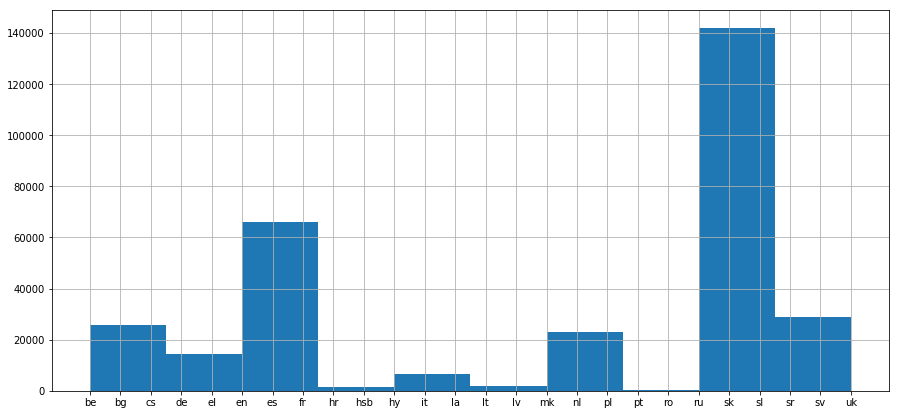

In [8]:
plt.figure(figsize=(15, 7))
data.lang.hist()

* Разобьем данные на обучающую и тестовую

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_index, test_index = next(sss.split(data.text, data.lang))
train_data = data.iloc[train_index]
test_data = data.iloc[test_index]

## Часть 1. Предварительная обработка данных и классификация на правилах

1. Протестируйте простой принцип классификации на правилах, например: 
    * Если в тексте встречается буква "э", то текст относится к классу "ru" (написан на русском, то есть)
    * Если в тексте встречается буква "ł", то текст относится к классу "pl" (написан на польском, то есть)
    * И любое другое правило, которое кажется вам разумным. 

In [ ]:
class RuleClassifer(object):
    def __init__(self):
        <your code here>

    def fit(self, x_train, y_train):
        """
        Метод обучает модель. может ничего не делать. Все правила могут быть заданы в predict.
        
        Parameters
        ----------
        x_train : list of str
            Список обучающих текстов.
        
        y_train : list of str
            Список меток классов (языков в нашем случае) для x_train
            
            
        Returns
        -------
        self : object
            Returns self
        """
        <your code here>

        return self
    
    def predict(self, text):
        """
        Предсказывает метки классов (языки) для text по правилам.
        
        Parameters
        ----------
        text : list of str
            Список строк для которых необходимо предсказать язык.
        
        Returns
        -------
        predictions : list of str
            Возвращает список классов для text.
        """
        predictions = []
        <your code here>
        return predictions

    pass

* Какова точность, полнота, аккуратность при использовании этих правил?

In [ ]:
rclf = RuleClassifer().fit(train_data.text, train_data.lang)
predictions = rclf.predict(test_data.text)

In [ ]:
print("Precision: {0:6.5f}".format(precision_score(test_data.lang, predictions, average='macro')))
print("Recall: {0:6.5f}".format(recall_score(test_data.lang, predictions, average='macro')))
print("F1-measure: {0:6.5f}".format(f1_score(test_data.lang, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(test_data.lang, predictions)))

2 . Определим сходство языков следующим образом: пусть $A_1$ и $A_2$ – множества символов из текстов на первом и втором языке соответственно (возможно, в этом случае разумно не исключать знаки пунктуации и учитывать регистр). Сходство языков измеряется по коэффициенту Жаккара: $\frac{A_1 \cap A_2}{A_1 \cup A_2}$. Постройте heatmap сходства языков. 

In [ ]:
from nltk.metrics import jaccard_distance
from itertools import combinations

def get_map(<your code here>):
    <your code here>

In [ ]:
hm = <your code here>

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    data=np.array(hm.values, dtype=np.float64),
    
    annot=True,
    xticklabels=langs, yticklabels=langs)
plt.title("Jaccard langs index")
plt.show()

##  Часть 2. Базовый метод классификации

Используйте метод наивного Байеса или логистическую регрессию для классификации текстов: в качестве признаков используйте символьные $n$-граммы. Сравните результаты, получаемые при разных $n=2,3,4$ по $F$-мере и аккуратности. Постройте диаграмму ошибок. Какие языке труднее всего разлечить? Какие проще всего?

Для генерации $n$-грамм используйте:

<pre>from nltk.util import ngrams</pre>

или

<pre>from sklearn.feature_extraction.text import CountVectorizer</pre>

Для объединения процесса подготовки выборки и классификации используйте Pipeline

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline

In [ ]:
clf = <yuor code here>

* Обучите модель

In [ ]:
%%time
clf.fit(train_data.text, train_data.lang)

* Посмотрим на метрики качества на тестовой выборке

In [ ]:
predictions = clf.predict(test_data.text)

In [ ]:
print("Precision: {0:6.5f}".format(precision_score(test_data.lang, predictions, average='macro')))
print("Recall: {0:6.5f}".format(recall_score(test_data.lang, predictions, average='macro')))
print("F1-measure: {0:6.5f}".format(f1_score(test_data.lang, predictions, average='macro')))
print("Accuracy: {0:6.5f}".format(accuracy_score(test_data.lang, predictions)))

* Постройте диаграмму ошибок

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20, 10))
sns.heatmap(data=confusion_matrix(test_data.lang, predictions), annot=True, cbar=False, xticklabels=langs, yticklabels=langs)
plt.title("Confusion matrix")
plt.show()

##  Часть 3. Продвинутые методы классфикации


Используйте FastText. Постройте диаграмму ошибок. Какие языке труднее всего разлечить? Какие проще всего?

Как использовать FastText: https://pypi.python.org/pypi/fasttext.

Хороший туториал: https://www.tutorialkart.com/fasttext/train-and-test-supervised-text-classifier-using-fasttext/.

* Структура файла, который принимает fasttext должна быть следующего вида:

\_\_label__ru Привет. Доброе утро. Пути народаа.

где "ru" метка текста "Привет. Доброе утро. Пути народаа."

Несколько меток для одного текста можно задать так:

\_\_label\_\_ru \_\_label\_\_en Good Morning. Дороу.

* Подготовьте данные для fasttext

In [ ]:
def prc_for_fasttext(data, file_name):
    <your code here>

* Чтобы обучить модель, используем следующую команду

In [ ]:
%%time
ftclf = fasttext.supervised("train_data_ft.txt", "model")

* Протестируем на тестовых данных:

In [ ]:
prc_for_fasttext(test_data, "test_data_ft.txt")

In [ ]:
result = ftclf.test("test_data_ft.txt")

In [ ]:
print("Precision: {0:6.5f}".format(result.precision))
print("Recall: {0:6.5f}".format(result.recall))

* Постройте диаграмму ошибок

In [ ]:
predictions = ftclf.predict(test_data.text.tolist())

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=confusion_matrix(test_data.lang, predictions), annot=True, cbar=False, xticklabels=langs, yticklabels=langs)
plt.title("Confusion matrix")
plt.show()